In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
lamok = pd.read_csv('datasets\\dengue.csv')

In [3]:
lamok

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
lamok.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [5]:
lamok['Month'] = lamok['Month'].astype('category')
lamok['Region'] = lamok['Region'].astype('category')

In [6]:
lamok.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h1> UniVariate</h1>

<h1>1. What is the total number of dengue cases recorded in the dataset?</h1>

In [7]:
lamok['Dengue_Cases'].value_counts()

Dengue_Cases
207    5
126    4
129    4
203    4
276    4
      ..
100    1
91     1
16     1
13     1
22     1
Name: count, Length: 794, dtype: int64

In [8]:
total_cases = lamok['Dengue_Cases'].sum()
print(f"Total Dengue Cases: {total_cases}")

Total Dengue Cases: 1147425


<p>Insight: There are 1,147,425 dengue cases happened from 2016-2020</p>

<h1>2. What is the total number of dengue deaths recorded in the dataset?</h1>

In [9]:
total_deaths = lamok['Dengue_Deaths'].sum()
print(f"Total Dengue Deaths: {total_deaths}")

Total Dengue Deaths: 16844


insight: there are 16,844 death cases from 2016-2020. 

<h1>3. Which region has the highest number of dengue cases?</h1>

In [10]:
region_cases = lamok.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)
print(f"Region with Highest Cases:\n{region_cases.head(5)}")

Region with Highest Cases:
Region
Region IV-A    163029
Region III     131064
Region VI      117523
NCR            115966
Region VII     110683
Name: Dengue_Cases, dtype: int64


Insight: The region that has the most cases of dengue is the region IV-A with 163,029 cases, followed by the Region III ith 131,064 cases and so on

<h1>4. Which region has the highest number of dengue deaths?</h1>

In [11]:
region_deaths = lamok.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False)
print(f"Region with Highest Deaths:\n{region_deaths.head(5)}")

Region with Highest Deaths:
Region
NCR           4008
Region XII    2796
Region VI     1825
Region VII    1760
CAR           1008
Name: Dengue_Deaths, dtype: int64


Insight: The highest death in all of the regions is NCR, even though the Region IV-A has the highest death cases, the NCR has the most death cases in the record

<h1>5. What is the average number of dengue cases per month?</h1>

In [12]:
avg_cases_per_month = np.round(lamok.groupby('Month')['Dengue_Cases'].mean(), 2)
print(f"Average Cases per Month:\n{avg_cases_per_month}")

Average Cases per Month:
Month
April         382.45
August       2206.52
December     1040.36
February      915.31
January       992.09
July         1626.38
June          683.65
March         677.36
May           381.02
November     1116.47
October      1384.06
September    2093.45
Name: Dengue_Cases, dtype: float64


<h1>6. Which year had the highest number of dengue cases?</h1>

In [13]:
year_cases = lamok.groupby('Year')['Dengue_Cases'].sum().sort_values(ascending=False)
print(f"Year with Highest Cases:\n{year_cases.head(5
                                                  )}")

Year with Highest Cases:
Year
2019    441902
2018    250783
2016    209544
2017    154155
2020     91041
Name: Dengue_Cases, dtype: int64


insight: the highest dengue cases happened was 2019 with the 441,982 

<h1>7. Which year had the highest number of dengue deaths?</h1>

In [15]:
year_deaths = lamok.groupby('Year')['Dengue_Deaths'].sum().sort_values(ascending=False)
print(f"Year with Highest Deaths:\n{year_deaths.head(5)}")

Year with Highest Deaths:
Year
2016    8127
2017    4563
2019    1733
2018    1226
2020    1195
Name: Dengue_Deaths, dtype: int64


Insight: there were 8127 deaths last 2016.

<h1>Bi Variate </h1>

<h1>8.  Is there a correlation between the number of dengue cases and the number of dengue deaths?</h1>

In [18]:
correlation = lamok['Dengue_Cases'].corr(lamok['Dengue_Deaths'])
print(f"Correlation between Dengue Cases and Deaths: {correlation}")

Correlation between Dengue Cases and Deaths: 0.03832213720419488


Insight: There is no correlation between the dengue cases and death cases

<h1>9.  Does the average number of cases per month correlate with the average number of deaths per month?</h1>

In [20]:
avg_cases_per_month = lamok.groupby('Month')['Dengue_Cases'].mean()
avg_deaths_per_month = lamok.groupby('Month')['Dengue_Deaths'].mean()

monthly_correlation = avg_cases_per_month.corr(avg_deaths_per_month)
print(f"Correlation between Average Monthly Cases and Deaths: {monthly_correlation}")

Correlation between Average Monthly Cases and Deaths: 0.5182805115849258


Insight: There is a correlation between the monthly average cases and average death cases

<h1>10. In regions with higher case counts, do we also see higher death counts?</h1>

In [21]:
region_summary = lamok.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()
region_correlation = region_summary['Dengue_Cases'].corr(region_summary['Dengue_Deaths'])
print(f"Correlation between Total Cases and Deaths across Regions: {region_correlation}")

Correlation between Total Cases and Deaths across Regions: 0.408170286966509


There is no correlation between the regions death cases and dengue cases

<h1>11. How does the number of dengue cases change over the years? </h1>

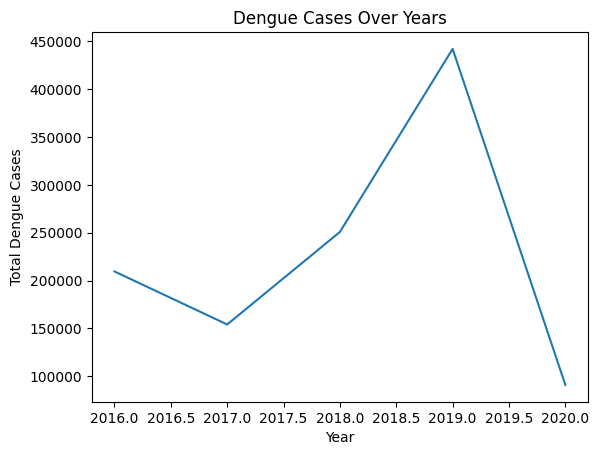

In [24]:
cases_by_year = lamok.groupby('Year')['Dengue_Cases'].sum()
plt.plot(cases_by_year.index, cases_by_year.values)
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.title('Dengue Cases Over Years')
plt.show()

<h1>12.  How does the number of dengue cases change over the years?</h1>

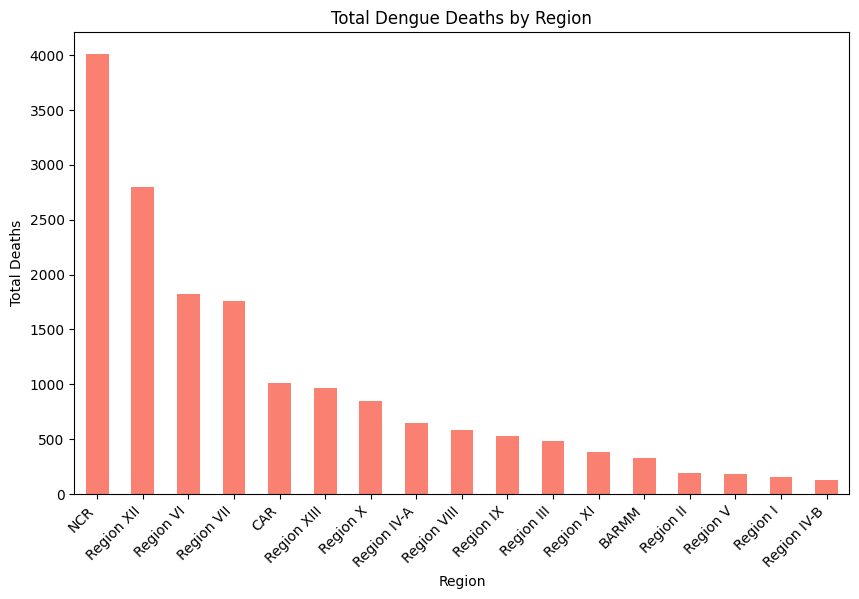

In [25]:
region_deaths = lamok.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_deaths.plot(kind='bar', color='salmon')
plt.title('Total Dengue Deaths by Region')
plt.xlabel('Region')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45, ha='right')
plt.show()

insight: this bar chart highlight the NCR to have the most total death across the whole region from 2016-2020. 

<h1>13. How have dengue cases changed over the years in NCR</h1>

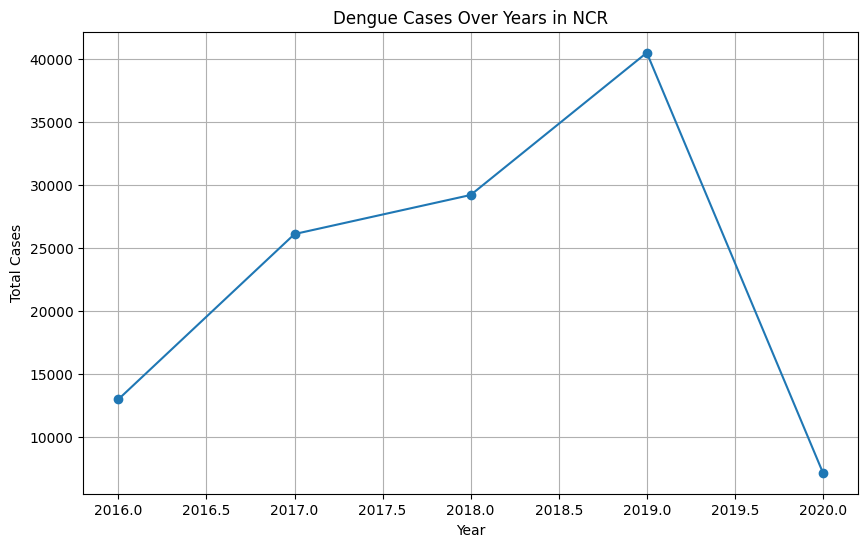

In [28]:
highest_death_region = region_deaths.index[0]
region_cases_over_time = lamok[lamok['Region'] == highest_death_region].groupby('Year')['Dengue_Cases'].sum()
plt.figure(figsize=(10, 6))
plt.plot(region_cases_over_time.index, region_cases_over_time.values, marker='o', linestyle='-')
plt.title(f'Dengue Cases Over Years in {highest_death_region}')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.show()

Insight: The graph shows a significant peak in dengue cases in 2019. This indicates that 2019 had a particularly high number of dengue cases compared to the other years in the data.

<h1>14. What is the percentage distribution of total dengue deaths among the top 5 regions with the highest death counts?</h1>

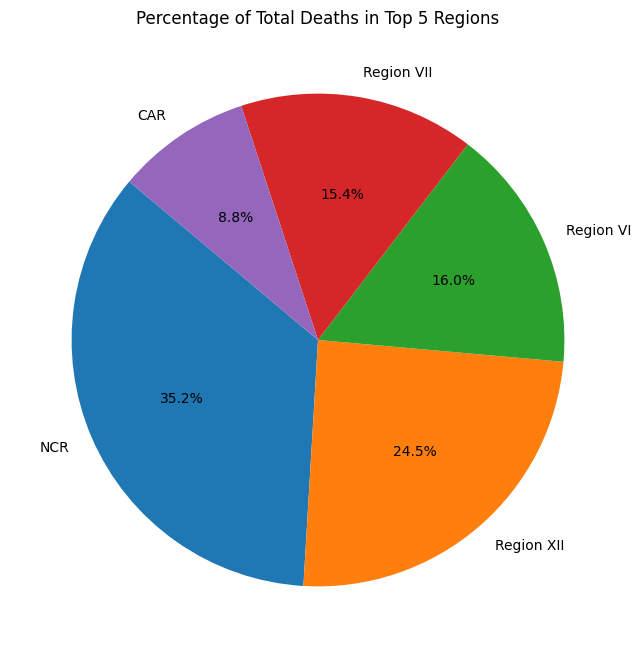

In [29]:
top_5_death_regions = region_deaths.head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_5_death_regions, labels=top_5_death_regions.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Deaths in Top 5 Regions')
plt.show()

insight:  The largest segment of the pie chart belongs to the NCR (National Capital Region), with 35.2% of the total deaths. This indicates that the NCR has the highest proportion of dengue-related fatalities among the top 5 regions.

insight:  Region XII has the second-highest percentage of deaths at 24.5%. This suggests that Region XII also experiences a significant burden of dengue-related mortality.

insight: It's important to consider the population size of each region when interpreting these percentages. A higher percentage in a densely populated region might not necessarily indicate a higher risk per capita.

<h1> 15. What is the average number of dengue deaths per month for each region?</h1>

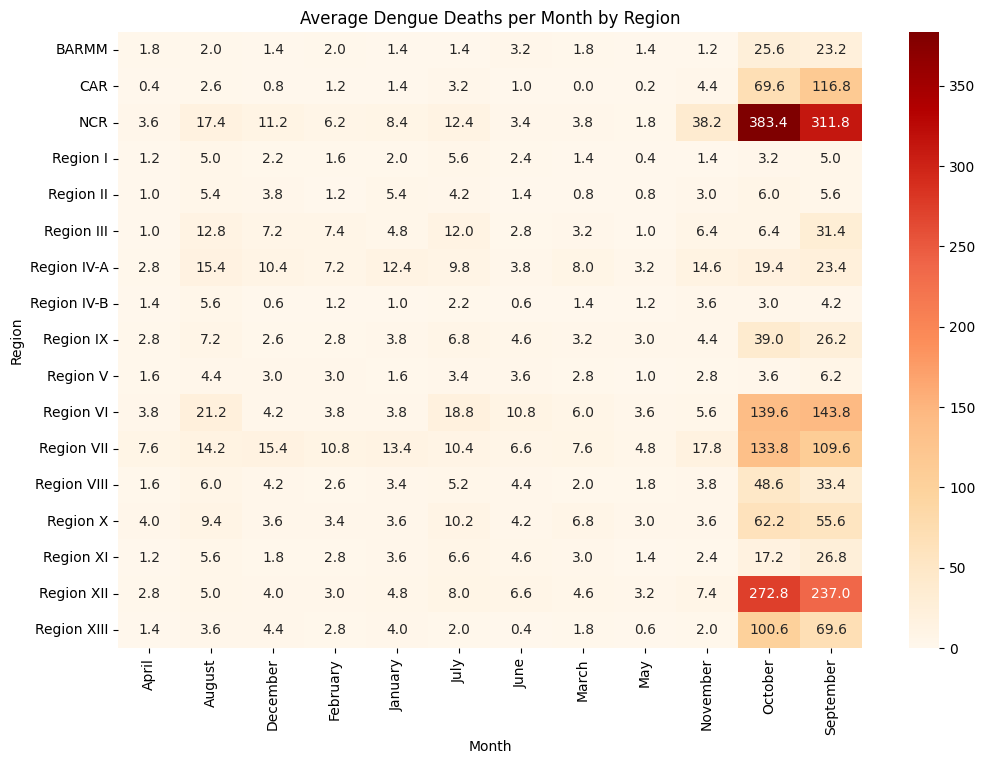

In [30]:
region_month_deaths = lamok.pivot_table(index='Region', columns='Month', values='Dengue_Deaths', aggfunc='mean', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(region_month_deaths, annot=True, fmt=".1f", cmap="OrRd")
plt.title('Average Dengue Deaths per Month by Region')
plt.show()

insight: The NCR (National Capital Region) consistently shows the highest average dengue deaths, particularly in the later months (presumably October, November, December). This is evident from the deep red color in those cells.

insight: Some regions, such as Region I and Region II, show consistently low average death rates throughout the year, suggesting potentially lower transmission or better control measures.